In [130]:
import pandas as pd 
import numpy as np
from sys import path 
path.append('../')
import edhec_risk_kit as erk

In [131]:
returns = pd.read_csv('../data/Portfolios_Formed_on_ME_monthly_EW.csv',
                      header=0,
                      index_col=0,
                      parse_dates=True,
                      na_values=-99.99)
columns = ['Lo 20', 'Hi 20']
returns = returns[columns]
returns = returns / 100
returns.index = pd.to_datetime(returns.index, format='%Y%m')
returns.index = returns.index.to_period('M')
returns.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [132]:
n_months = returns.shape[0]
returns_per_month = (returns+1).prod()**(1/n_months) - 1
returns_per_month * 100

Lo 20    1.185974
Hi 20    0.785878
dtype: float64

In [133]:
annualized_return = (returns_per_month+1)**12 - 1
annualized_return * 100

Lo 20    15.197701
Hi 20     9.849021
dtype: float64

In [134]:
annualized_vol = returns.std(ddof=0)*np.sqrt(12)
annualized_vol * 100

Lo 20    33.654957
Hi 20    19.502813
dtype: float64

In [135]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol * 100

Lo 20    33.670128
Hi 20    19.511604
dtype: float64

In [136]:
erk.annualize_vol(returns, 12) * 100

Lo 20    33.670128
Hi 20    19.511604
dtype: float64

In [137]:
erk.annualize_rets(returns, 12) * 100

Lo 20    15.197701
Hi 20     9.849021
dtype: float64

In [138]:
returns_1999_2015 = returns.loc['1999':'2015']
drawdown_1999_2015_small_cap = erk.drawdown(return_series=returns_1999_2015['Lo 20'])
drawdown_1999_2015_large_cap = erk.drawdown(return_series=returns_1999_2015['Hi 20'])
erk.annualize_rets(returns_1999_2015, 12) * 100

Lo 20    11.442634
Hi 20     6.286512
dtype: float64

In [139]:
erk.annualize_vol(returns_1999_2015, 12) * 100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

In [140]:
erk.drawdown(returns_1999_2015['Lo 20'])['Drawdown'].idxmax()

Period('1999-01', 'M')

-55.27349978713653

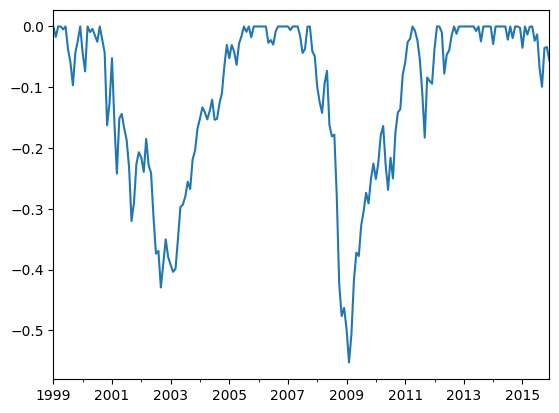

In [141]:
drawdown_1999_2015_large_cap['Drawdown'].plot()
drawdown_1999_2015_large_cap['Drawdown'].min() * 100


-62.48092431236988

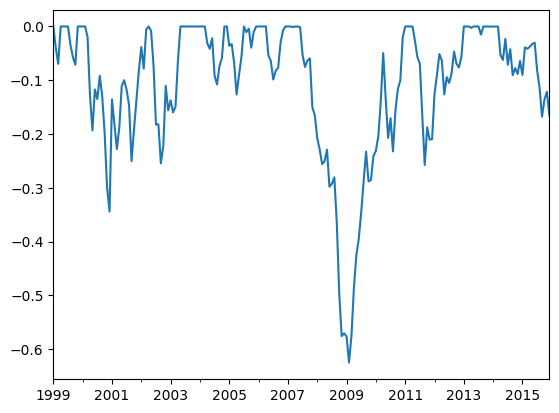

In [142]:
drawdown_1999_2015_small_cap['Drawdown'].plot()
drawdown_1999_2015_small_cap['Drawdown'].min() * 100


In [143]:
drawdown_1999_2015_small_cap['Drawdown'].idxmin()

Period('2009-02', 'M')

In [145]:
drawdown_1999_2015_large_cap['Drawdown'].idxmin()

Period('2009-02', 'M')

In [146]:
hfi = erk.get_hfi_returns()['2009':'2018']

/home/tom/Dropbox/projects/coursera_edhec_AdvancedPortfolioConstructionAndAnalysisWithPython/Section 2- Beyond the Gaussian case:Extreme risk estimates/../edhec_risk_kit.py:22: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("../data/edhec-hedgefundindices.csv",


Convertible Arbitrage     0.006681
CTA Global                0.010996
Distressed Securities     0.009498
Emerging Markets          0.015276
Equity Market Neutral     0.005186
Event Driven              0.010135
Fixed Income Arbitrage    0.003321
Global Macro              0.005075
Long/Short Equity         0.012139
Merger Arbitrage          0.003611
Relative Value            0.005711
Short Selling             0.021240
Funds Of Funds            0.007948
dtype: float64

In [147]:
erk.semideviation(hfi).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [149]:
erk.skewness(hfi).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [150]:
erk.kurtosis(hfi).sort_values()

CTA Global                2.591087
Merger Arbitrage          2.715238
Global Macro              3.164362
Distressed Securities     3.319725
Event Driven              3.620617
Funds Of Funds            3.816132
Long/Short Equity         4.115713
Short Selling             4.175832
Emerging Markets          4.401636
Relative Value            4.512482
Equity Market Neutral     5.071677
Fixed Income Arbitrage    6.406941
Convertible Arbitrage     6.775731
dtype: float64